In [1]:
#!pip install tsfeatures

In [2]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
my_path = os.path.abspath('')

import pprint
from sklearn.decomposition import PCA
from kats.consts import TimeSeriesData
from statsmodels.tsa.seasonal import STL
from kats.utils.simulator import Simulator
from sklearn.preprocessing import StandardScaler
from kats.tsfeatures.tsfeatures import TsFeatures

my_path = os.path.abspath('')
my_path = my_path.split('\\')
my_path_py = "\\".join(my_path[:-1])

C:\ProgramData\Anaconda3\envs\kats\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
timeSeries = pd.read_csv(my_path_py+'\\DatosRaw\\TimeSerie_Incidencia2009al2013.csv', sep=',')
timeSeries = timeSeries.drop('Unnamed: 0', axis=1)
Clusters = pd.read_csv('ClusterFB1_2009al2013.csv', sep=',')
Clusters = Clusters.drop('Unnamed: 0', axis=1)

In [4]:
Clusters

,Distrito,Cluster KM,Cluster HAC,Cluster DB SP
0,ASUNCION,0,4,0
1,FERNANDO DE LA MORA,3,0,1
2,PEDRO JUAN CABALLERO,4,1,1
3,YBY YAU,0,4,1
4,YPANE,4,1,1
...,...,...,...,...
195,ISLA UMBU,0,4,0
196,VILLA OLIVA,0,4,0
197,CARMELO PERALTA,0,4,0
198,DESMOCHADOS,0,4,0


In [5]:
Clusters['Cluster KM'].values.tolist()[1]


3

# GRÁFICOS FB TOTAL

In [6]:
timeSeries

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,0.376373,1.881864e-01,5.645592e-01,3.763728e-01,1.693678e+00,1.505491e+00,2.822796e+00,3.199169e+00,6.398338e+00,1.016207e+01,...,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
1,0.698734,2.794936e+00,2.794936e+00,1.117974e+01,6.288605e+00,6.288605e+00,1.048101e+01,7.686073e+00,6.987339e+00,6.987339e+00,...,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
2,1.937177,9.685887e-01,7.748709e+00,1.646601e+01,2.324613e+01,1.356024e+01,1.356024e+01,1.549742e+01,2.421472e+01,3.777496e+01,...,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
3,15.606711,1.170503e+02,1.209520e+02,3.511510e+01,6.242684e+01,1.170503e+01,7.803355e+00,3.901678e+00,3.901678e+00,1.170503e+01,...,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
4,2.736203,8.208608e+00,8.208608e+00,1.641722e+01,1.368101e+01,1.641722e+01,2.462582e+01,2.736203e+01,1.915342e+01,5.472405e+00,...,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,33.333333,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,...,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
196,27.129680,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,...,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
197,23.540490,2.354049e+01,2.354049e+01,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,...,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11
198,56.497175,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,...,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11,1.000000e-11


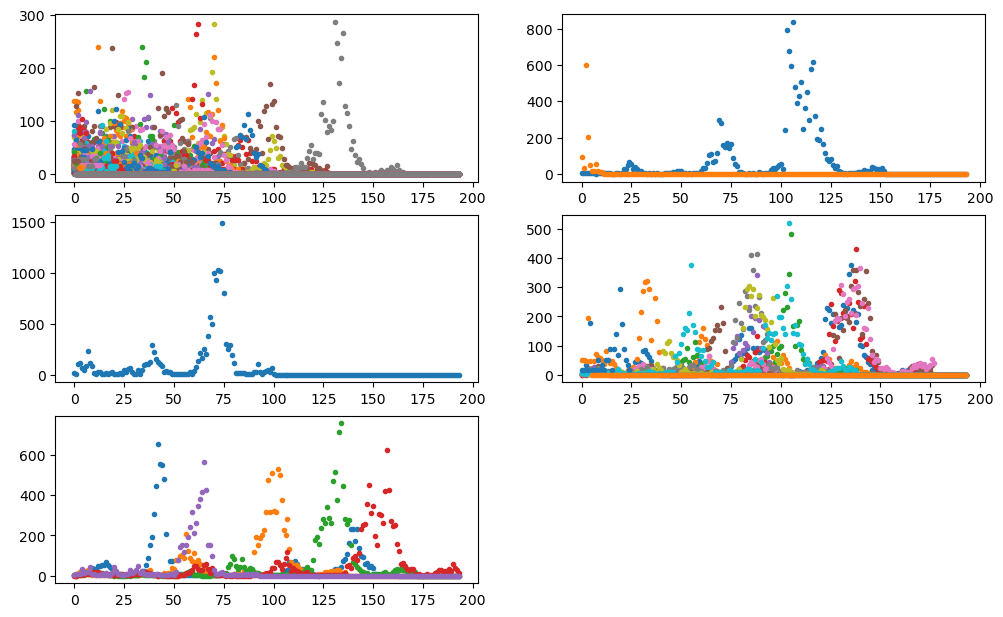

In [7]:
plt.figure(figsize=(12, 10))
model = Clusters['Cluster KM'].values.tolist()
for j in list(range(5)):
    #print("J es: ", j)
    plt.subplot(4,2,j+1)
    #plt.title('Class = %s'%(),fontsize=20)
    for i in list(range(len(timeSeries))):
        #print("I es: ", i)
        if(model[i]==j):
            #print(timeSeries.loc[i,:].values)
            plt.plot(list(range(len(timeSeries.loc[i,:].values))), timeSeries.loc[i,:].values,'.')
            
plt.savefig(my_path_py + '/Pictures/ClustersKM_FB18.png')

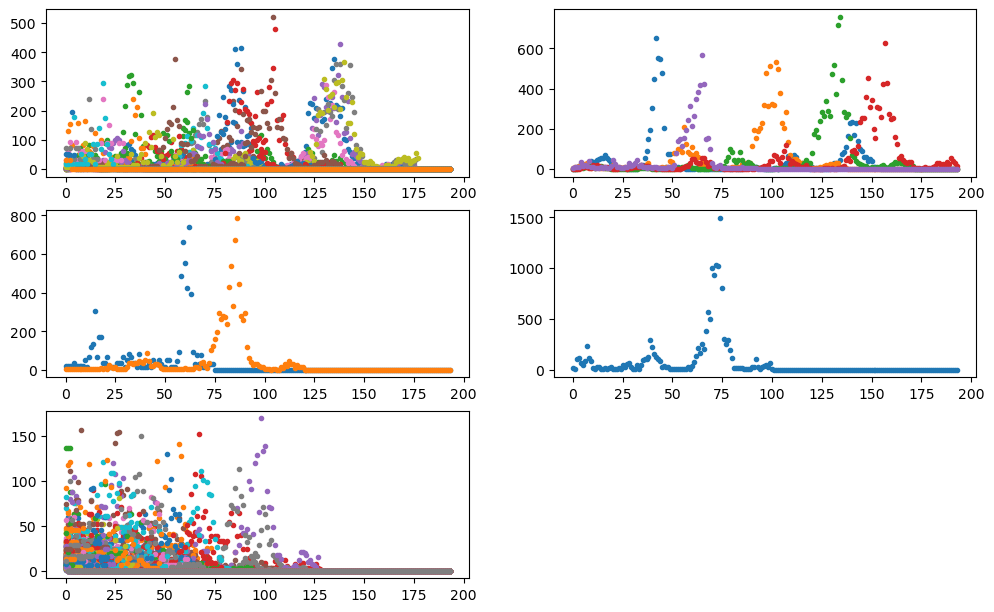

In [8]:
plt.figure(figsize=(12, 10))
model = Clusters['Cluster HAC '].values.tolist()
for j in list(range(5)):
    #print("J es: ", j)
    plt.subplot(4,2,j+1)
    #plt.title('Class = %s'%(),fontsize=20)
    for i in list(range(len(timeSeries))):
        #print("I es: ", i)
        if(model[i]==j):
            #print(timeSeries.loc[i,:].values)
            plt.plot(list(range(len(timeSeries.loc[i,:].values))), timeSeries.loc[i,:].values,'.')

plt.savefig(my_path_py + '/Pictures/ClustersHAC_FB18.png')

{0, 1, -1}


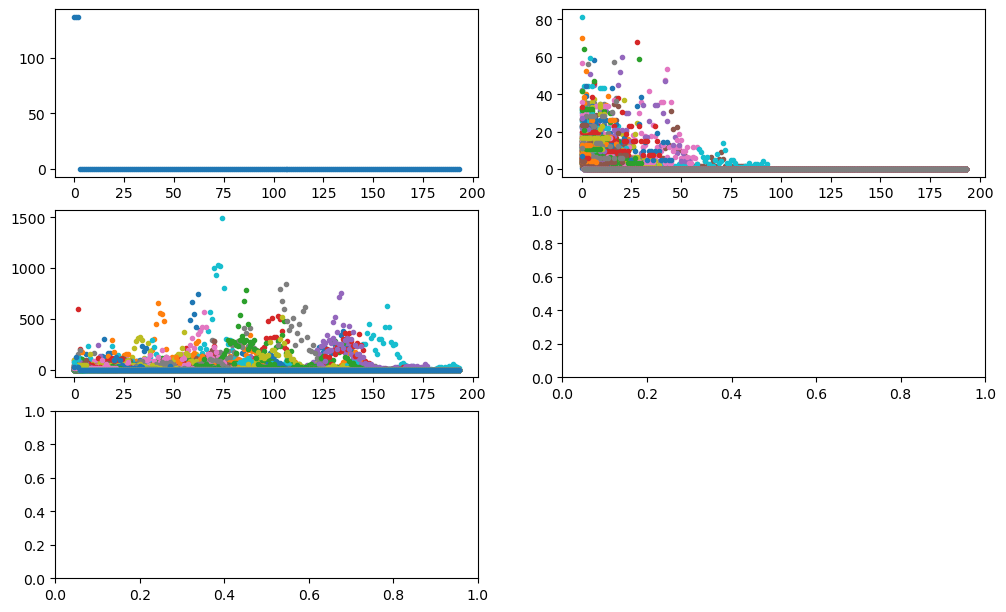

In [9]:
print(set(Clusters['Cluster DB SP'].values.tolist()))

plt.figure(figsize=(12, 10))
model = Clusters['Cluster DB SP'].values.tolist()
for j in list(range(5)):
    #print("J es: ", j)
    plt.subplot(4,2,j+1)
    #plt.title('Class = %s'%(),fontsize=20)
    for i in list(range(len(timeSeries))):
        #print("I es: ", i)
        if(model[i]==j-1):
            #print(timeSeries.loc[i,:].values)
            plt.plot(list(range(len(timeSeries.loc[i,:].values))), timeSeries.loc[i,:].values,'.')

plt.savefig(my_path_py + '/Pictures/ClustersDBS_FB18.png')

# GRÁFICOS FB 2009 AL 2011

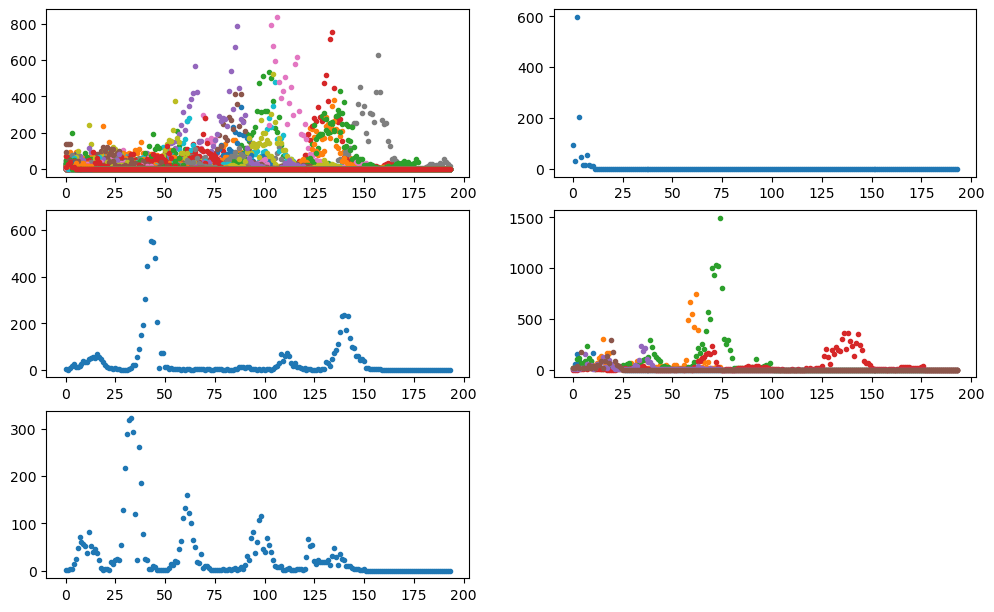

In [10]:
df_comp = pd.DataFrame()
df_comp['Distrito'] = Clusters['Distrito']

Clusters1 = pd.read_csv('ClusterFB1_2009-2010-2011.csv', sep=',')
Clusters1 = Clusters1.drop('Unnamed: 0', axis=1)
Clusters1 = Clusters1.rename(columns={"Cluster KM": "KM P1"})
Clusters1 = Clusters1.rename(columns={"Cluster DB SP": "DB P1"})

df_comp = pd.merge(df_comp, Clusters1[['Distrito','KM P1', 'DB P1']], how="outer", on=["Distrito"])

plt.figure(figsize=(12, 10))
model = df_comp['KM P1'].values.tolist()
for j in list(range(5)):
    #print("J es: ", j)
    plt.subplot(4,2,j+1)
    #plt.title('Class = %s'%(),fontsize=20)
    for i in list(range(len(timeSeries))):
        if(model[i]==j):
            #print(timeSeries.loc[i,:].values)
            plt.plot(list(range(len(timeSeries.loc[i,:].values))), timeSeries.loc[i,:].values,'.')

plt.savefig(my_path_py + '/Pictures/ClustersKM_FB18_Periodo1.png')

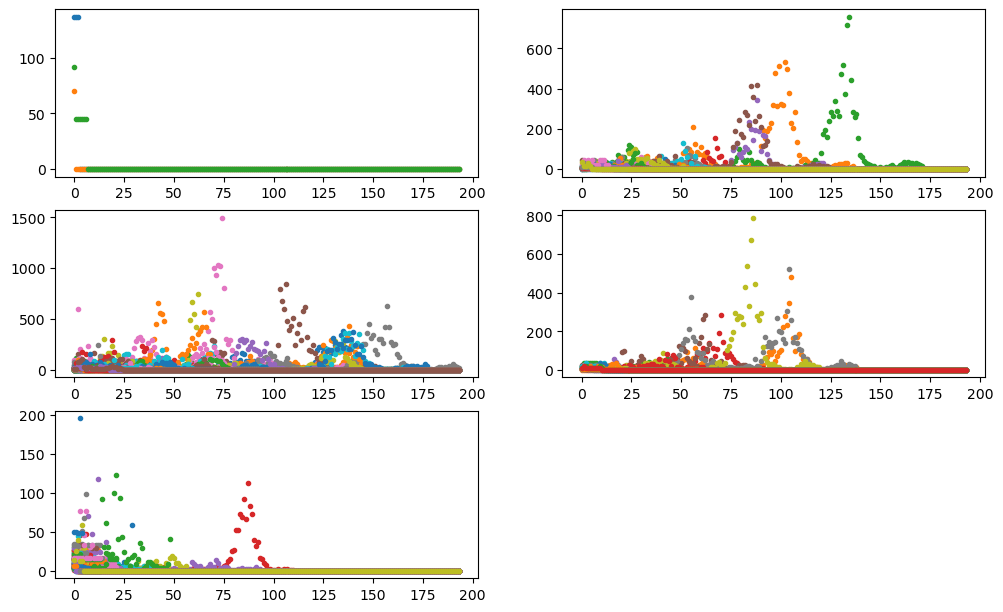

In [11]:
plt.figure(figsize=(12, 10))
model = df_comp['DB P1'].values.tolist()

for j in list(range(5)):
    #print("J es: ", j)
    plt.subplot(4,2,j+1)
    #plt.title('Class = %s'%(),fontsize=20)
    for i in list(range(len(timeSeries))):
        #print("I es: ", i)
        if(model[i]==j-1):
            #print(timeSeries.loc[i,:].values)
            plt.plot(list(range(len(timeSeries.loc[i,:].values))), timeSeries.loc[i,:].values,'.')
plt.savefig(my_path_py + '/Pictures/ClustersDBS_FB18_Periodo1.png')

# GRÁFICOS FB 2012/13

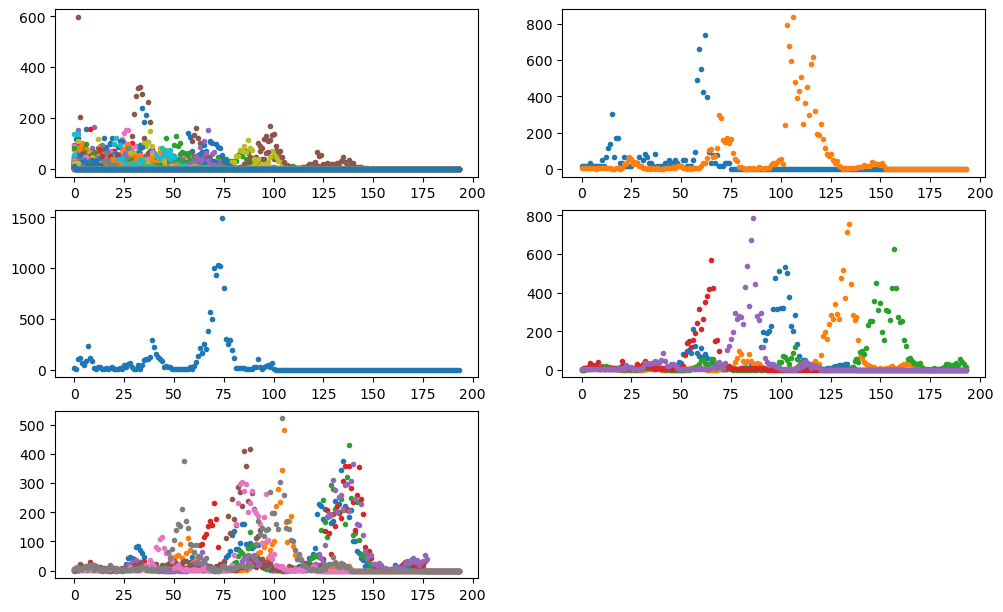

In [12]:
df_comp = pd.DataFrame()
df_comp['Distrito'] = Clusters['Distrito']

Clusters1 = pd.read_csv('ClusterFB1_2012-2013.csv', sep=',')
Clusters1 = Clusters1.drop('Unnamed: 0', axis=1)
Clusters1 = Clusters1.rename(columns={"Cluster KM": "KM P2"})
Clusters1 = Clusters1.rename(columns={"Cluster DB SP": "DB P2"})

df_comp = pd.merge(df_comp, Clusters1[['Distrito','KM P2', 'DB P2']], how="outer", on=["Distrito"])

plt.figure(figsize=(12, 10))
model = df_comp['KM P2'].values.tolist()
for j in list(range(5)):
    #print("J es: ", j)
    plt.subplot(4,2,j+1)
    #plt.title('Class = %s'%(),fontsize=20)
    for i in list(range(len(timeSeries))):
        if(model[i]==j):
            #print(timeSeries.loc[i,:].values)
            plt.plot(list(range(len(timeSeries.loc[i,:].values))), timeSeries.loc[i,:].values,'.')
plt.savefig(my_path_py + '/Pictures/ClustersKM_FB18_Periodo2.png')

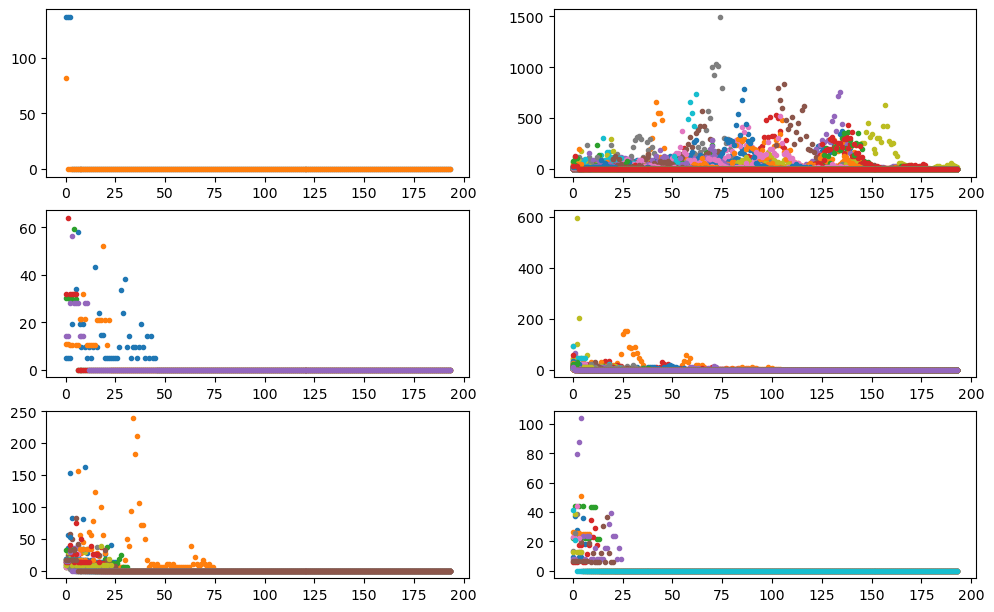

In [13]:
plt.figure(figsize=(12, 10))
model = df_comp['DB P2'].values.tolist()

for j in list(range(6)):
    #print("J es: ", j)
    plt.subplot(4,2,j+1)
    #plt.title('Class = %s'%(),fontsize=20)
    for i in list(range(len(timeSeries))):
        #print("I es: ", i)
        if(model[i]==j-1):
            #print(timeSeries.loc[i,:].values)
            plt.plot(list(range(len(timeSeries.loc[i,:].values))), timeSeries.loc[i,:].values,'.')
plt.savefig(my_path_py + '/Pictures/ClustersDBS_FB18_Periodo2.png')